# $k$ plus proches voisins

<iframe
    src="https://mozilla.github.io/pdf.js/web/viewer.html?file=https://raw.githubusercontent.com/mp2i-fsm/mp2i-2021/main/10_sql/2_join/sql_join.pdf#zoom=page-fit&pagemode=none"
    height=500 width=100% allowfullscreen></iframe>

In [1]:
! pip install networkx

Defaulting to user installation because normal site-packages is not writeable


```{margin}
Calcul de distance euclidienne
```

In [2]:
def dist(u, v):
    return (u[0] - v[0])**2 + (u[1] - v[1])**2

In [3]:
def plus_frequent(L):
    frequences = {}
    maxi = None
    for e in L:
        if e not in frequences:
            frequences[e] = 0
        frequences[e] += 1
        if not maxi or frequences[e] > frequences[maxi]:
            maxi = e
    return maxi

In [4]:
import heapq

def knn(k, X_train, Y_train, x):
    distances = []
    for i in range(len(X_train)):
        distances.append((dist(x, X_train[i]), Y_train[i]))
    
    k_distances = heapq.nsmallest(k, distances)
    
    voisins = []
    for d, y_train in k_distances:
        voisins.append(y_train)
    
    return plus_frequent(voisins)

In [5]:
import random

X_train = [(random.random(), random.random()) for _ in range(15)]
Y_train = [0]*5 + [1]*5 + [2]*5

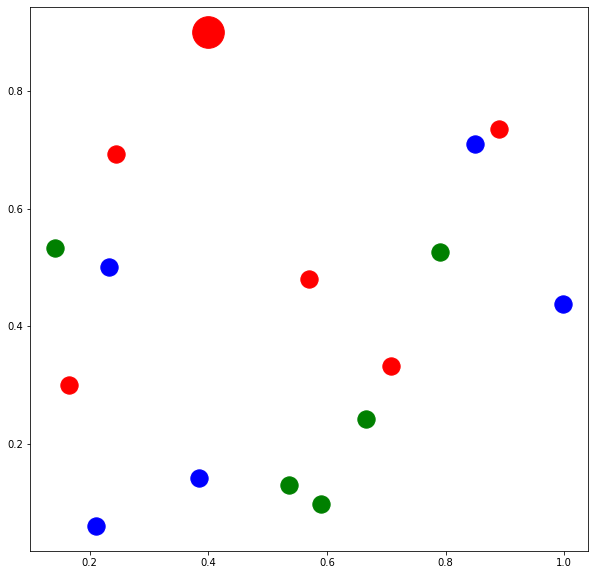

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ['r', 'g', 'b']
coords = list(zip(*X_train))
plt.figure(figsize=(10, 10))
for i in range(len(X_train)):
    plt.scatter(X_train[i][0], X_train[i][1], color=colors[Y_train[i]], s=300);

x = (.4, .9)
y = knn(9, X_train, Y_train, x)
plt.scatter(x[0], x[1], color=colors[y], s=1000);